### import torch , bumpy and matplot 

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### check gpu

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### import data

In [17]:
temp_x = np.loadtxt("./qsort_qsort.py.csv",dtype=np.float32, delimiter=",")
temp_y = np.loadtxt("qsort_result.txt",dtype=np.float32, delimiter=",")


### process data 
[>0 => 1, 0 => 0]  


In [ ]:
x_train = np.float32(temp_x>0)
y_train = temp_y     

### set size and batch

In [ ]:
n_in, n_h, n_out, batch_size = len(x_train[0]), 3, 1, len(x_train)

x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train.T)


### design model,loss function and optimizer

In [19]:
model = nn.Sequential(nn.Linear(n_in,n_h),
                          nn.Sigmoid(),
                          nn.Linear(n_h,n_out),
                          nn.Sigmoid())
# loss
criterion = torch.nn.MSELoss()
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,weight_decay = 1e-6)
print(model)
print(criterion)
print(optimizer)

Sequential(
  (0): Linear(in_features=35, out_features=3, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=3, out_features=1, bias=True)
  (3): Sigmoid()
)
MSELoss()
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 1e-06
)


### save loss for draw plot


In [8]:
loss_list =[]

### train



In [9]:
for i in range(3000):
    # forward prapagation
    model.train()
    y_pred = model(x_train)

    # loss
    loss = criterion(y_pred,y_train)
    loss_list.append(float(loss))

    #print(model.named_parameters())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print('i: ', i, ' loss: ', loss.item())

i:  0  loss:  0.2806034982204437
i:  100  loss:  0.25861021876335144
i:  200  loss:  0.24451930820941925
i:  300  loss:  0.23548853397369385
i:  400  loss:  0.22963358461856842
i:  500  loss:  0.225783571600914
i:  600  loss:  0.22321736812591553
i:  700  loss:  0.22148628532886505
i:  800  loss:  0.22030645608901978
i:  900  loss:  0.2194952666759491
i:  1000  loss:  0.21893338859081268
i:  1100  loss:  0.21854177117347717
i:  1200  loss:  0.21826736629009247
i:  1300  loss:  0.2180742472410202
i:  1400  loss:  0.21793779730796814
i:  1500  loss:  0.21784108877182007
i:  1600  loss:  0.21777236461639404
i:  1700  loss:  0.21772339940071106
i:  1800  loss:  0.2176884561777115
i:  1900  loss:  0.2176634669303894
i:  2000  loss:  0.2176455855369568
i:  2100  loss:  0.21763277053833008
i:  2200  loss:  0.21762356162071228
i:  2300  loss:  0.2176169604063034
i:  2400  loss:  0.21761220693588257
i:  2500  loss:  0.21760879456996918
i:  2600  loss:  0.2176063358783722
i:  2700  loss:  0.2176

### print loss result


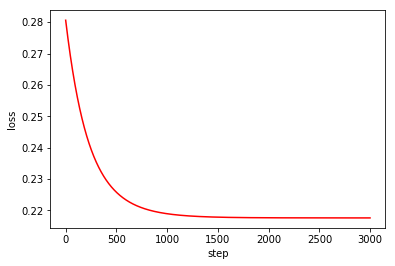

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xlabel('step')
plt.ylabel('loss')
plt.plot([i for i in range(3000)], loss_list, c='r')
plt.show()

### get fail line set

In [ ]:
s_f = [1]*n_in
for i in range(batch_size):
    if(y_train[i]==1):
        s_f = np.multiply(s_f,x_train[i])
s_f

### test fail line

In [14]:
model.eval()
result = []
for i in range(n_in):
    if(s_f[i]==1):
        test = torch.tensor(np.float32([0]*n_in))
        test[i] = 1
        result.append((i+1,float(model(test)[0])))

sorted(result,key=lambda x:x[1],reverse=True)


[(26, 0.6905935406684875),
 (10, 0.6893508434295654),
 (9, 0.6891078352928162),
 (14, 0.688995361328125),
 (6, 0.6887840628623962),
 (18, 0.688305675983429),
 (22, 0.68817138671875),
 (4, 0.6868780255317688),
 (15, 0.686158299446106),
 (19, 0.6861116290092468),
 (5, 0.685859739780426),
 (29, 0.6858188509941101),
 (30, 0.6857354044914246),
 (27, 0.6851668953895569),
 (17, 0.6850924491882324),
 (13, 0.6846706867218018),
 (7, 0.6846639513969421),
 (8, 0.6846418380737305),
 (16, 0.684525728225708)]